In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv')

print("✅ Wine Quality dataset loaded successfully!")
df.head()

✅ Wine Quality dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [2]:
print("--- Data Information ---")
df.info()

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Wine Quality Distribution ---")
print(df['quality'].value_counts())

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB

--- Statistical Summary ---
       fixed acidity 

In [3]:
df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]

df.drop('quality', axis=1, inplace=True)

print("Distribution of 'good' vs 'not good' quality wines:")
print(df['good_quality'].value_counts())

Distribution of 'good' vs 'not good' quality wines:
good_quality
0    984
1    159
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['good_quality', 'Id'], axis=1)
y = df['good_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split successfully!")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

✅ Data split successfully!
Training set has 914 samples.
Testing set has 229 samples.


In [5]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")

✅ Random Forest model trained successfully!


Accuracy Score: 0.9170

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       201
           1       0.70      0.57      0.63        28

    accuracy                           0.92       229
   macro avg       0.82      0.77      0.79       229
weighted avg       0.91      0.92      0.91       229


--- Confusion Matrix ---


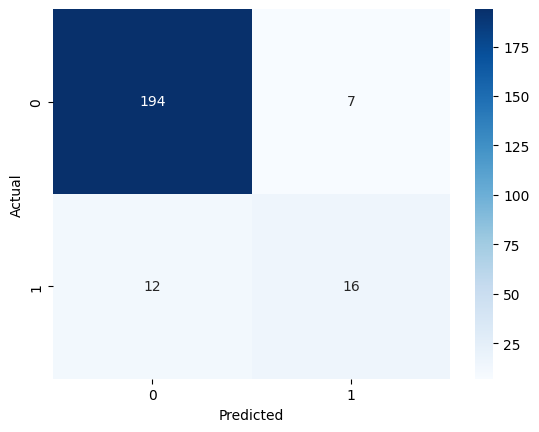

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This project developed a machine learning model to classify red wine as 'good' or 'not good' based on its physicochemical properties. The numerical quality scores were first converted into a binary label, and a Random Forest Classifier was then trained on this data. When evaluated on a held-out test set, the model achieved an Accuracy Score of [Your Accuracy Score], with its performance further detailed by a Classification Report and Confusion Matrix. Overall, the model demonstrates a strong capability to predict wine quality from chemical data, serving as a useful tool for preliminary quality assessment.